# Linear Regression using Scikit-Learn

There is an open-source, commercially usable machine learning toolkit called [scikit-learn](https://scikit-learn.org/stable/index.html). This toolkit contains implementations of many of the algorithms that you will work with in this course.



## Goals
In this lab you will:
- Utilize  scikit-learn to implement linear regression using a close form solution based on the normal equation

## Tools
You will utilize functions from scikit-learn as well as matplotlib and NumPy. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from lab_utils_multi import load_house_data
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)

<a name="toc_40291_2"></a>
# Linear Regression, closed-form solution
Scikit-learn has the [linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) which implements a closed-form linear regression.

Let's use the data from the early labs - a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |


### Load the data set

In [10]:
X_train = np.array([1.0, 2.0])   #features
y_train = np.array([300, 500])   #target value

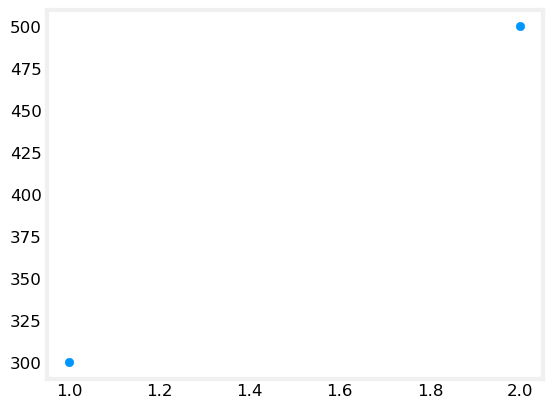

In [11]:
plt.scatter(X_train, y_train)

### Create and fit the model
The code below performs regression using scikit-learn. 
The first step creates a regression object.  
The second step utilizes one of the methods associated with the object, `fit`. This performs regression, fitting the parameters to the input data. The toolkit expects a two-dimensional X matrix.

In [13]:
linear_model = LinearRegression()
#X must be a 2-D Matrix
linear_model.fit(X_train.reshape(-1, 1), y_train) 

LinearRegression()

### View Parameters 
The $\mathbf{w}$ and $\mathbf{b}$ parameters are referred to as 'coefficients' and 'intercept' in scikit-learn.

In [14]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")
print(f"'manual' prediction: f_wb = wx+b : {1200*w + b}")

w = [200.], b = 100.00
'manual' prediction: f_wb = wx+b : [240100.]


### Make Predictions

Calling the `predict` function generates predictions.

In [15]:
y_pred = linear_model.predict(X_train.reshape(-1, 1))

print("Prediction on training set:", y_pred)

X_test = np.array([[1200]])
print(f"Prediction for 1200 sqft house: ${linear_model.predict(X_test)[0]:0.2f}")

Prediction on training set: [300. 500.]
Prediction for 1200 sqft house: $240100.00


## Second Example
The second example is from an earlier lab with multiple features. The final parameter values and predictions are very close to the results from the un-normalized 'long-run' from that lab. That un-normalized run took hours to produce results, while this is nearly instantaneous. The closed-form solution work well on smaller data sets such as these but can be computationally demanding on larger data sets. 
>The closed-form solution does not require normalization.

In [18]:
# load the dataset
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']
y_train.shape

(99,)

In [7]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train) 

LinearRegression()

In [8]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")

w = [  0.27 -32.62 -67.25  -1.47], b = 220.42


In [9]:
print(f"Prediction on training set:\n {linear_model.predict(X_train)[:4]}" )
print(f"prediction using w,b:\n {(X_train @ w + b)[:4]}")
print(f"Target values \n {y_train[:4]}")

x_house = np.array([1200, 3,1, 40]).reshape(-1,4)
x_house_predict = linear_model.predict(x_house)[0]
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.2f}")

Prediction on training set:
 [295.18 485.98 389.52 492.15]
prediction using w,b:
 [295.18 485.98 389.52 492.15]
Target values 
 [300.  509.8 394.  540. ]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318709.09


## Congratulations!
In this lab you:
- utilized an open-source machine learning toolkit, scikit-learn
- implemented linear regression using a close-form solution from that toolkit